In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import seaborn as sns
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

In [3]:
!pip install plotly

In [4]:
df = pd.read_csv(r'data.csv')
df.sample(5)

T    TM    Tm     SLP     H   VV    V    VM  hurricanes
627   31.2  36.0  26.4  1003.3  72.0  1.9  3.5  13.0   41.875000
1159  22.7  30.4  12.8  1017.7  56.0  2.6  2.4   7.6   79.833333
152    NaN   NaN   NaN     NaN   NaN  NaN  NaN   NaN         NaN
643   30.0  35.8  24.2  1007.7  58.0  2.6  9.6  18.3   45.958333
474    NaN   NaN   NaN     NaN   NaN  NaN  NaN   NaN         NaN

In [5]:
print("df.shape : ", df.shape)

df.shape :  (2186, 9)


In [6]:
print(df.columns)

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'hurricanes'], dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2186 entries, 0 to 2185
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   T           1093 non-null   float64
 1   TM          1093 non-null   float64
 2   Tm          1093 non-null   float64
 3   SLP         1093 non-null   float64
 4   H           1093 non-null   float64
 5   VV          1093 non-null   float64
 6   V           1093 non-null   float64
 7   VM          1093 non-null   float64
 8   hurricanes  1092 non-null   float64
dtypes: float64(9)
memory usage: 153.8 KB


In [8]:
df.isnull()

T     TM     Tm    SLP      H     VV      V     VM  hurricanes
0      True   True   True   True   True   True   True   True        True
1     False  False  False  False  False  False  False  False       False
2      True   True   True   True   True   True   True   True        True
3     False  False  False  False  False  False  False  False       False
4      True   True   True   True   True   True   True   True        True
...     ...    ...    ...    ...    ...    ...    ...    ...         ...
2181  False  False  False  False  False  False  False  False       False
2182   True   True   True   True   True   True   True   True        True
2183  False  False  False  False  False  False  False  False       False
2184   True   True   True   True   True   True   True   True        True
2185  False  False  False  False  False  False  False  False       False

[2186 rows x 9 columns]

In [9]:
df.describe().T

count         mean        std    min          25%          50%  \
T           1093.0    26.009241   7.237401    6.7    19.300000    28.200000   
TM          1093.0    32.482251   6.679078    9.8    27.800000    34.200000   
Tm          1093.0    19.460201   7.438653    0.0    12.100000    21.200000   
SLP         1093.0  1008.081885   7.529237  991.5  1001.100000  1008.100000   
H           1093.0    62.918573  15.709816   20.0    54.000000    64.000000   
VV          1093.0     2.003111   0.747541    0.3     1.600000     1.900000   
V           1093.0     6.751510   3.841137    0.4     3.700000     6.500000   
VM          1093.0    15.805124   7.308435    1.9    11.100000    14.800000   
hurricanes  1092.0   109.090984  84.465790    0.0    41.833333    83.458333   

                    75%     max  
T             31.700000    38.5  
TM            37.000000    45.5  
Tm            26.000000    32.7  
SLP         1015.000000  1023.2  
H             74.000000    98.0  
VV             2.600000     5.8  
V              9.100000    24.4  
VM            18.300000    57.6  
hurricanes   158.291667   404.5

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(1092, 9)

In [12]:
figure = px.line(df, x="hurricanes", 
                 y="T", 
                 title='hurricanes in year')
figure.show()

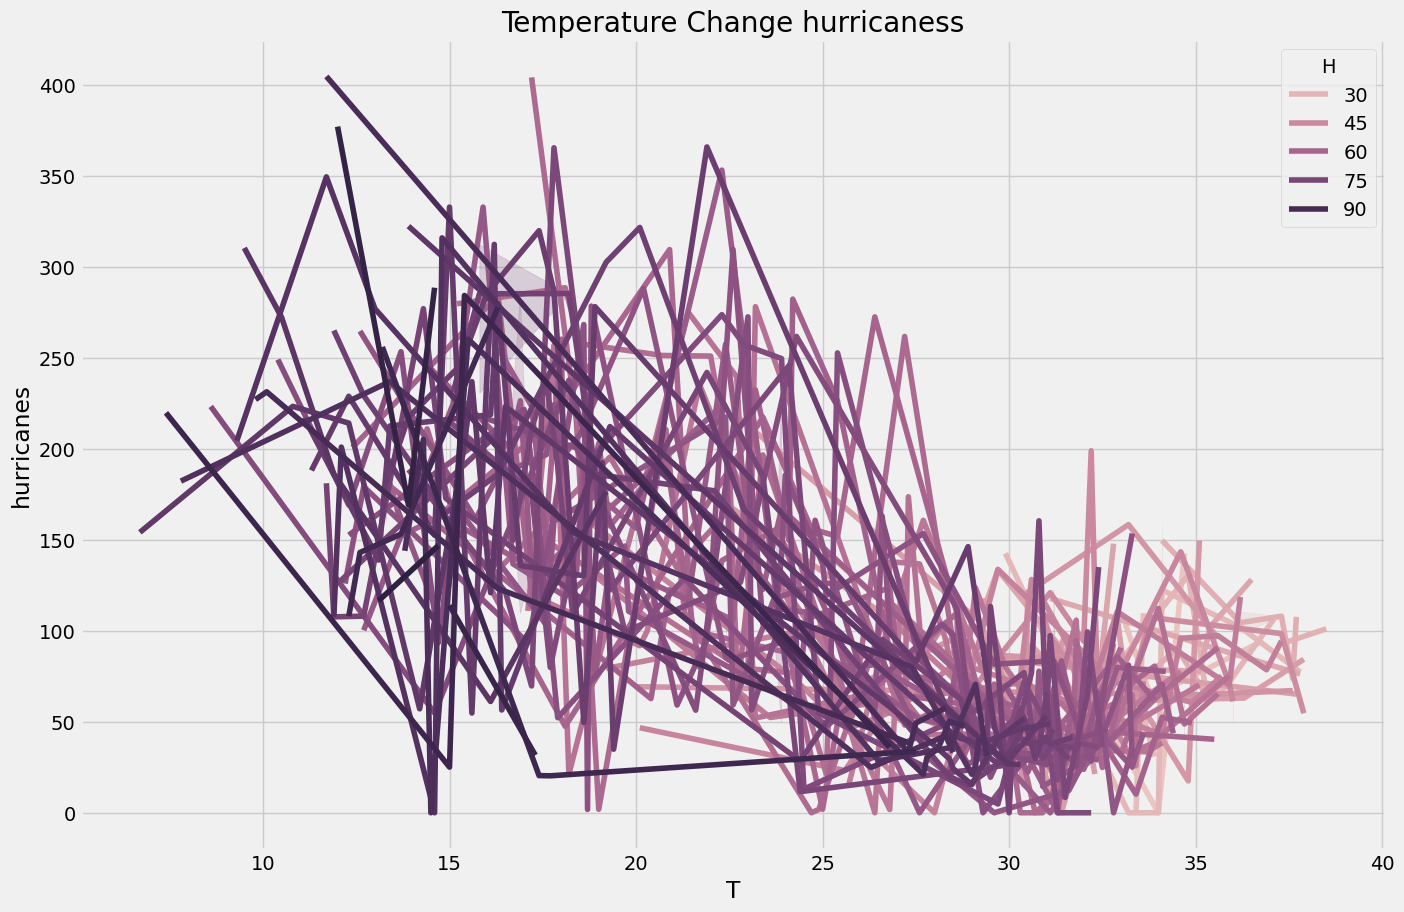

In [13]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.title("Temperature Change hurricaness")
sns.lineplot(data = df, x='T', y='hurricanes', hue='H')
plt.show()

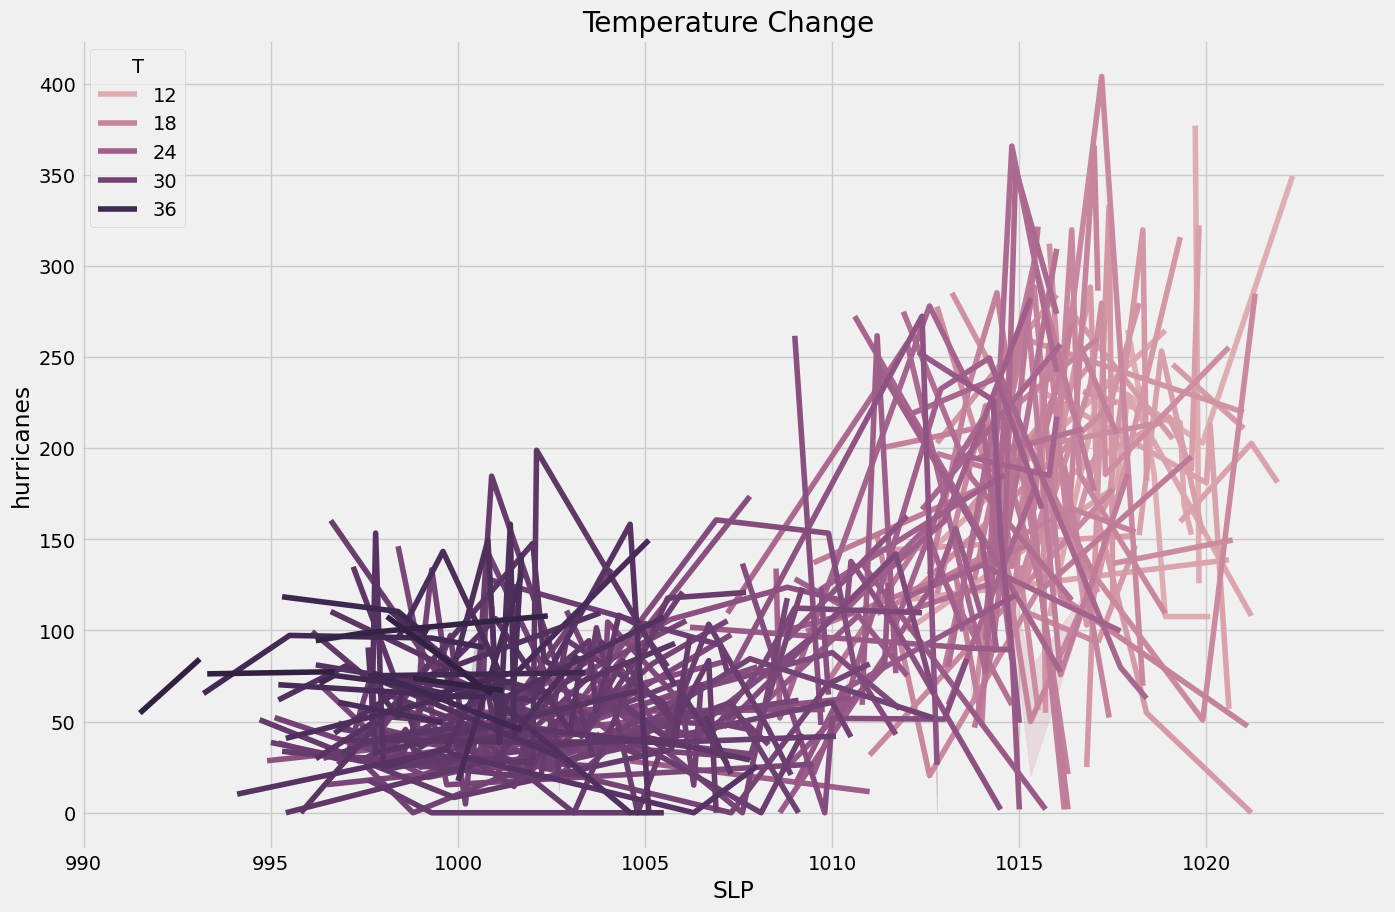

In [14]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.title("Temperature Change ")
sns.lineplot(data = df, x='SLP', y='hurricanes', hue='T')
plt.show()

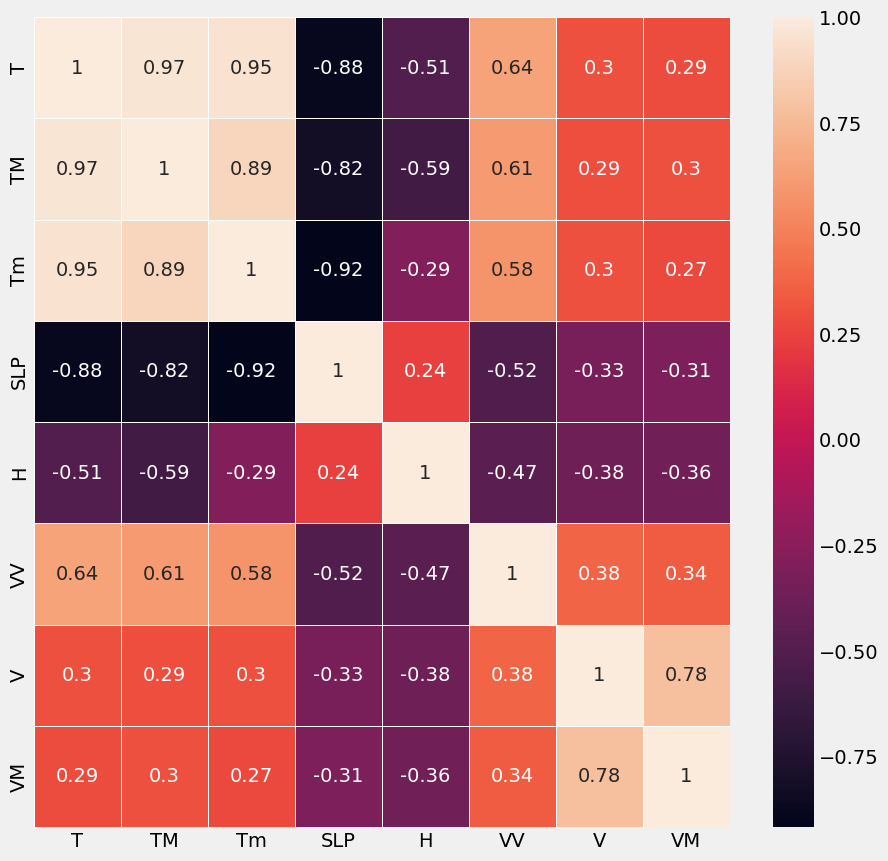

In [15]:
corrmat = df.corr()
top_corr_features = corrmat.index[:-1] # dropping 'Acceptable'

plt.figure(figsize=(10,10))

#plot heat map
sns.heatmap(df[top_corr_features].corr(),annot = True, linewidths=.5)
# print(corrmat)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

X=df.iloc[:,0:8]
y=df.iloc[:,8] 


In [13]:
X

T    TM    Tm     SLP     H   VV     V    VM
1      7.4   9.8   4.8  1017.6  93.0  0.5   4.3   9.4
3      7.8  12.7   4.4  1018.5  87.0  0.6   4.4  11.1
5      6.7  13.4   2.4  1019.4  82.0  0.6   4.8  11.1
7      8.6  15.5   3.3  1018.7  72.0  0.8   8.1  20.6
9     12.4  20.9   4.4  1017.3  61.0  1.3   8.7  22.2
...    ...   ...   ...     ...   ...  ...   ...   ...
2177  18.1  24.0  11.2  1015.4  56.0  1.8  15.9  25.9
2179  17.8  25.0  10.7  1015.8  54.0  2.3   9.4  22.2
2181  13.9  24.5  11.4  1015.0  95.0  0.6   8.7  14.8
2183  16.3  23.0   9.8  1016.9  78.0  1.1   7.4  16.5
2185  16.3  23.4   9.0  1017.3  68.0  1.3   7.8  18.3

[1092 rows x 8 columns]

In [14]:
y

1       219.720833
3       182.187500
5       154.037500
7       223.208333
9       200.645833
           ...    
2177    288.416667
2179    256.833333
2181    169.000000
2183    186.041667
2185    185.583333
Name: hurricanes, Length: 1092, dtype: float64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 42)

In [16]:
X.head()

T    TM   Tm     SLP     H   VV    V    VM
1   7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4
3   7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1
5   6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1
7   8.6  15.5  3.3  1018.7  72.0  0.8  8.1  20.6
9  12.4  20.9  4.4  1017.3  61.0  1.3  8.7  22.2

In [17]:
y.head()

1    219.720833
3    182.187500
5    154.037500
7    223.208333
9    200.645833
Name: hurricanes, dtype: float64

In [18]:
X_train.shape

(982, 8)

In [19]:
print('Length of X_train', len(X_train))
print('Length of X_val', len(X_test))
print('Length of y_train', len(y_train))
print('Length of y_val', len(y_test))

Length of X_train 982
Length of X_val 110
Length of y_train 982
Length of y_val 110


In [20]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [21]:
model = MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)

In [36]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test,predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 3593.47565921503


In [24]:
import os
import pickle
if os.path.isfile(r"LSTM_model1.pkl"):
    print("File Exists")
else:
    pickle.dump(model,open(r'LSTM_model1.pkl','wb'))
    print("Model Loaded!")

Model Loaded!


In [25]:
import pickle
import numpy as np

model1 = pickle.load(open(r'LSTM_model1.pkl', 'rb'))  
d1=float(input("Enter T: "))
d2=float(input("Enter TM: "))
d3=float(input("Enter Tm: "))
d4=float(input("Enter SLP: "))
d5=float(input("Enter H: "))
d6=float(input("Enter VV: "))
d7=float(input("Enter V: "))
d8=float(input("Enter VM: "))
arr = np.array([[ d1,d2,d3,d4,d5,d6,d7,d8]])
print([ d1,d2,d3,d4,d5,d6,d8])
pred1 = model1.predict(arr)
print(pred1)


Enter T: 7.3
Enter TM: 9.4
Enter Tm: 4.6
Enter SLP: 1015.3
Enter H: 92.5
Enter VV: 0.5
Enter V: 4.2
Enter VM: 9.1
[7.3, 9.4, 4.6, 1015.3, 92.5, 0.5, 9.1]
[229.54401438]


C:\Users\RETECH\anaconda3\envs\ArtificialIntelligence\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
